In [42]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
#import pyplot as plt
from functools import reduce
from datetime import date
from datetime import datetime
from dtale.views import startup
import dtale

In [3]:
#import matplotlib.rcsetup as rcsetup

In [4]:
#print(rcsetup.all_backends)

In [5]:
dental = pd.read_csv('../data/Smileon.2021.10.17.csv', encoding = "latin-1", skiprows=2)
dental.shape

(57860, 184)

In [6]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [7]:
#replace spaces with underscores to be able to read  column names
dental.columns = dental.columns.str.replace(' ','_')

In [8]:
#rename columns
dental = dental.rename(columns={'CallerNum': 'Patient'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Household_Income_Level': 'Household_Income_Level'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Gender': 'Gender'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Preferred_Language/Language_Needed': 'Language'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Race/Ethnicity': 'Race_Ethnicity'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_#_of_People_in_Household': 'People_in_Household'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Other_Language': 'Other_Language'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_What_other_assistance_programs_are_you_on?': 'What_other_assistance_programs_are_you_on?'})
s = dental[~pd.isnull(dental['Language'])]['Language']

In [9]:
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_#_of_People_in_Household': 'People_in_Household'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Other_Language': 'Other_Language'})

In [10]:
list(dental.columns.values)

['CallReportNum',
 'ReportVersion',
 'LinkedToCallReportNum',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'Patient',
 'PhoneWorkerNum',
 'WasRealCall',
 'WasHangup',
 'WasSexCall',
 'WasWrongNumber',
 'WasPrankCall',
 'WasSilentCall',
 'GeoCode',
 'GeoAssignment',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'CensusDivision',
 'CensusTrack',
 'CensusReportingArea',
 '211Region',
 'PhoneType',
 'ThirdPartyName',
 'ThirdPartyOrganization',
 'ThirdPartyPhoneNumber',
 'ThirdPartyAddress',
 'ThirdPartyCity',
 'ThirdPartyCounty',
 'ThirdPartyStateProvince',
 'ThirdPartyPostalCode',
 'Narrative',
 'VolunteerComments',
 'Feedback',
 'CallersFeedback',
 'TextField2',
 'TextField3',
 'TextField4',
 'TextField5',
 'TextField6',
 'TextField7',
 'TextField8',
 'TextField9',
 'TextField10',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Supervisor',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsM

In [11]:
#dental.drop(['PhoneType', 'OrgNum', 'LinkedToCallReportNum'], axis=1)

In [12]:
# drops columns that have only NAN values
#dental.dropna(how='all', axis=1, inplace=True)

In [13]:
#drop duplicates in Patient (CallerNum)
duplicates = dental.duplicated(['Patient'], keep='first')
dental = dental[~duplicates]

In [14]:
if isinstance(dental, (pd.DatetimeIndex, pd.MultiIndex)):
	dental = dental.to_frame(index=False)

In [15]:
# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
dental = dental.reset_index().drop('index', axis=1, errors='ignore')
 # update columns to strings in case they are numbers
dental.columns = [str(c) for c in dental.columns] 

In [16]:
female_cnt = dental['Gender'].eq('Female').sum()
male_cnt = dental['Gender'].eq('Male').sum()
#print(female_cnt, male_cnt)
dental['Gender'].value_counts()

Female         6774
Male           3815
Transgender       1
Other             1
Name: Gender, dtype: int64

In [17]:
# or like...
Gender = dental.Gender.value_counts()
print(Gender)

Female         6774
Male           3815
Transgender       1
Other             1
Name: Gender, dtype: int64


In [18]:
Gender = sns.histplot(data=dental, x = 'Gender', bins = 4)
plt.show()

In [19]:
#obtain values in Race/Ethnicity
#column = 'Race_Ethnicity'
RaceEthnicity = dental.Race_Ethnicity.value_counts()
print(RaceEthnicity)

Caucasian                            5934
African American                     2660
Hispanic                              456
Asian                                 151
Unknown                               115
American Indian and Alaska Native      52
Multi-racial                           33
Pacific Islander                        9
Name: Race_Ethnicity, dtype: int64


In [20]:
#dental['Race_Ethnicity'].describe()
#dental['Race_Ethnicity'].value_counts(normalize = True)

In [21]:
Gender = sns.histplot(data=dental, x = 'Race_Ethnicity', bins = 8)
plt.show()

In [22]:
#obtain values of language preferred/needed
#'SMILE_ON_60+_Demographic_Information_-_Preferred_Language/Language_Needed'
language = dental['Language'].value_counts()
print(language)

English    3154
Spanish     374
Other       116
Arabic       64
Name: Language, dtype: int64


In [23]:
#dental_df[(dental['Language'] == 'English') & (dental['Gender'] == 'Female')]['Race_Ethnicity'].describe()

NameError: name 'dental_df' is not defined

In [ ]:
#dental_df[(dental['Language'] == 'English') & (dental['Gender'] == 'Male')]['Race_Ethnicity'].describe()

In [ ]:
#Gender and Race/Ethnicity, Language
dental_df = dental[[
    'Race_Ethnicity',
    'Gender',
    'Language'
]].copy()

In [ ]:
sns.histplot(
    data = dental,
    x = 'Gender',
   # stat = 'probability',
    discrete = True,
    binrange = (22, 105),
    color = 'lightblue'
).set(title='Race and Language')

In [24]:
#Other languages
'SMILE_ON_60+_Demographic_Information_-_Other_Language'
otherlanguage = dental['Other_Language'].value_counts()
print(otherlanguage)

Farsi             4
Mandarin          4
Burmese           3
Amharic           2
Russian           2
Kurdish           2
Vietnamese        2
Laos              2
Kunama            1
Swahili           1
Kinyarwanda       1
Ethiopian         1
Mayan             1
Somali            1
East African      1
Kurdish-Badini    1
Laotian           1
Chinese           1
Nepali            1
Korean            1
English           1
Name: Other_Language, dtype: int64


In [27]:
#obtain Household Income Level
#'SMILE_ON_60+_Demographic_Information_-_Household_Income_Level'
houseincome = dental['Household_Income_Level'].value_counts()
print(houseincome)

$0 - $21 280     7474
$21246-$24280    1417
$24281-$27315     445
$28806-$32920     398
$32921-$37035     146
$41561-$46755      82
$36366-$41560      73
$43926-$50200      23
$50201-$56475      13
$59046-$67480       9
$58841-$66195       7
$51486-$58840       6
$76121-$85635       3
$84761-$95355       3
$67481-$75915       3
$66606-$76120       2
$74166-$84760       1
Name: Household_Income_Level, dtype: int64


In [ ]:
sns.set_theme(style="whitegrid")
#f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="People_in_Household", y="Household_Income_Level", data=dental, order = dental["People_in_Household"],
             color="b")

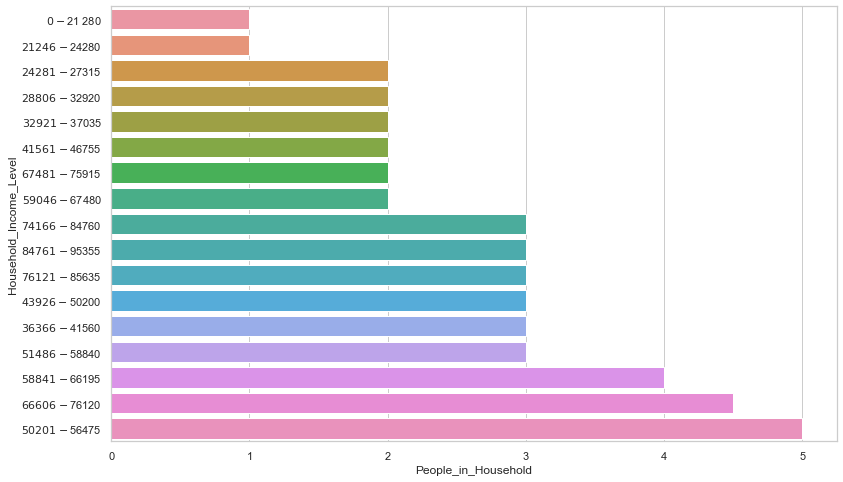

In [54]:
dental1 = dental.groupby(['Household_Income_Level'])['People_in_Household'].aggregate(np.median).reset_index().sort_values('People_in_Household')
sns.barplot(x='People_in_Household', y="Household_Income_Level", data=dental1) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

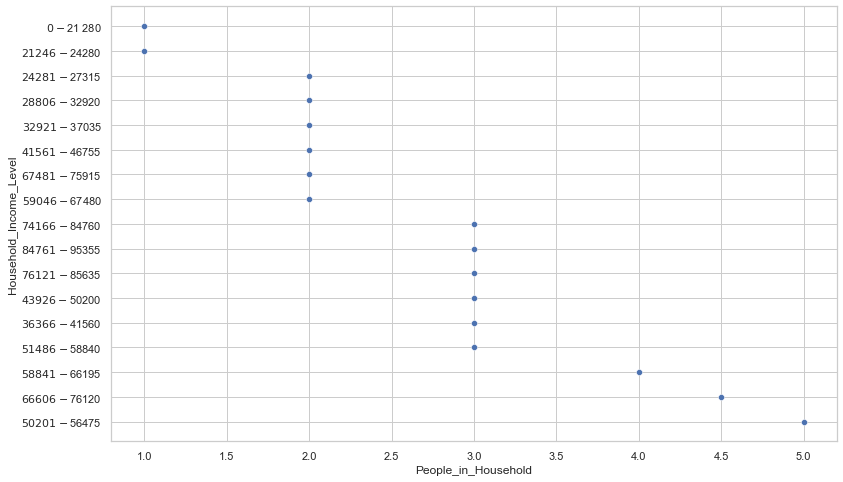

In [53]:
dental1 = dental.groupby(['Household_Income_Level'])['People_in_Household'].aggregate(np.median).reset_index().sort_values('People_in_Household')
sns.scatterplot(x='People_in_Household', y="Household_Income_Level", data=dental1) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [ ]:
# too many columns with duplicates, i will merge these values into a couple
# 3 or more
# 4 or more
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare; SSI/SSDI'],'3 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare; Section 8'],'3 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; Section 8; SSI/SSDI '],'3 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['TennCare; Section 8; SSI/SSDI'],'3 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare; Section 8; SSI/SSDI'],'4 +')
# still messy, merge 2 +
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare'],'2 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; SSI/SSDI'],'2 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['TennCare; SSI/SSDI'],'2 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; Section 8'],'2 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['Section 8; SSI/SSDI'],'2 +')
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['TennCare; Section 8'],'2 +')

In [ ]:
# forgot one...
dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; Section 8; SSI/SSDI'],'3 +')

In [ ]:
#Enrolled in OTHER assistance programs, which ones?
# 'SMILE_ON_60+_Demographic_Information_-_What_other_assistance_programs_are_you_on?'
otherprograms = dental['What_other_assistance_programs_are_you_on?'].value_counts()
print(otherprograms)

In [ ]:
#otherprograms1 = dental['What_other_assistance_programs_are_you_on?']
#otherprograms1 = dental.replace({
#	np.nan: 'Not_Provided',
#})

In [37]:
#drop all NAN values in a column
#dental = dental[dental['People_in_Household'].notna()]
dental = dental.dropna(subset=['People_in_Household'])

In [29]:
#column type 0 means python object type string
dental['People_in_Household'].dtypes

dtype('O')

In [58]:
#drop what is not needed
dental.drop(dental.index[dental['People_in_Household'] == '13900'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '1886'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '1886'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '2864'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '8368'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '112'], inplace=True)

In [59]:
householdnumber = dental['People_in_Household'].value_counts()
print(householdnumber)

1        6446
2        2733
3         507
4         260
5         153
6          57
7          32
8          15
9           5
0           2
10          1
112         1
2864        1
1886        1
8368        1
13900       1
Name: People_in_Household, dtype: int64


In [39]:
#change value
dental['People_in_Household'] = dental['People_in_Household'].replace(['1_____'],'1')
dental['People_in_Household'] = dental['People_in_Household'].replace(['2_____'],'2')
dental['People_in_Household'] = dental['People_in_Household'].replace(['3_____'],'3')
dental['People_in_Household'] = dental['People_in_Household'].replace(['6_____'],'6')
dental['People_in_Household'] = dental['People_in_Household'].replace(['1.0'],'1')
dental['People_in_Household'] = dental['People_in_Household'].replace(['2.0'],'2')
dental['People_in_Household'] = dental['People_in_Household'].replace(['3.0'],'3')
dental['People_in_Household'] = dental['People_in_Household'].replace(['4.0'],'4')
dental['People_in_Household'] = dental['People_in_Household'].replace(['5.0'],'5')
dental['People_in_Household'] = dental['People_in_Household'].replace(['6.0'],'6')
dental['People_in_Household'] = dental['People_in_Household'].replace(['7.0'],'7')
dental['People_in_Household'] = dental['People_in_Household'].replace(['8.0'],'8')
dental['People_in_Household'] = dental['People_in_Household'].replace(['9.0'],'9')
dental['People_in_Household'] = dental['People_in_Household'].replace(['10.0'],'10')

In [ ]:
#tried to change 0 - zero so i could drop it, but couldnt
#dental['People_in_Household'] = dental['People_in_Household'].replace(['0'],'zero')

In [ ]:
#tried to drop zero - couldn't 
#dental.drop(dental.index[dental['People_in_Household'] == 'zero'], inplace=True)

In [34]:
dental.drop(dental.index[dental['People_in_Household'] == NaN], inplace=True)

In [40]:
dental['People_in_Household'] = dental['People_in_Household'].astype(int)

In [57]:
#Average of people in a household?
# 'SMILE_ON_60+_Demographic_Information_-_#_of_People_in_Household''
householdnumber = dental['People_in_Household'].value_counts()
print(householdnumber)

1        6446
2        2733
3         507
4         260
5         153
6          57
7          32
8          15
9           5
0           2
10          1
112         1
2864        1
1886        1
8368        1
13900       1
Name: People_in_Household, dtype: int64


In [ ]:
# we are attempting to filter two columns based on a value
#example: tom_and_42 = df[(df["Name"]=="Tom") & (df["Age"]==42)]

#racelanguage = newdental[(newdental["SMILE_ON_60+_Demographic_Information_-_Race/Ethnicity"] == "Caucasian") & (newdental["SMILE_ON_60+_Demographic_Information_-_Preferred_Language/Language_Needed"] == "English")]                      

In [ ]:
dental.info()

In [30]:
d = dtale.show(dental)
# open it in a new window in browser
d.open_browser()

In [ ]:
#export data
dental_df.to_csv('../data/Smileon.2021.10.17.CLEAN.csv', index = False)